In [1]:
TRAIN_CSV_FILE = "train.csv"
TEST_CSV_FILE = "test.csv"
RODOLFO_CSV_FILE = "rodolfo.csv"
ANKUR_CSV_FILE = "ankur.csv"
CAROLINE_CSV_FILE = "caroline.csv"

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import librosa
import csv
import os

def extractWavFeatures(soundFilesFolder, csvFileName):
    print("The features of the files in the folder "+soundFilesFolder+" will be saved to "+csvFileName)
    header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
    for i in range(1, 21):
        header += f' mfcc{i}'
    header += ' label'
    header = header.split()
    print('CSV Header: ', header)
    file = open(csvFileName, 'w', newline='')
    #with file:
    writer = csv.writer(file)
    writer.writerow(header)
    genres = '1 2 3 4 5 6 7 8 9 0'.split()
    for filename in os.listdir(soundFilesFolder):
        number = f'{soundFilesFolder}/{filename}'
        y, sr = librosa.load(number, mono=True, duration=30)
        # remove leading and trailing silence
        y, index = librosa.effects.trim(y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        #file = open('data.csv', 'a', newline='')
        #with file:
        #    writer = csv.writer(file)
        writer.writerow(to_append.split())
    file.close()
    print("End of extractWavFeatures")

# comment these lines if you already have train.csv and test.csv files
#extractWavFeatures("../data/recordings/train", TRAIN_CSV_FILE)
#extractWavFeatures("../data/recordings/test", TEST_CSV_FILE)
#extractWavFeatures("../data/recordings/rodolfo", RODOLFO_CSV_FILE)
#extractWavFeatures("../data/recordings/ankur", ANKUR_CSV_FILE)
#extractWavFeatures("../data/recordings/caroline", CAROLINE_CSV_FILE)



In [3]:
#Reading a dataset and convert file name to corresbonding umnber

import pandas as pd
import csv
from sklearn import preprocessing

def preProcessData(csvFileName):
    print(csvFileName+ " will be preprocessed")
    data = pd.read_csv(csvFileName)
    # we have three speakers: 
    # 0: Jackson
    # 1: Nicolas 
    # 2: Theo
    filenameArray = data['filename'] 
    speakerArray = []
    #print(filenameArray)
    for i in range(len(filenameArray)):
        speaker = filenameArray[i][2]
        #print(speaker)
        if speaker == "j":
            speaker = "0"
        elif speaker == "n":
            speaker = "1"
        elif speaker == "t":
            speaker = "2"
        else: 
            speaker = "3"
        #print(speaker)
        speakerArray.append(speaker)
    data['number'] = speakerArray
    #Dropping unnecessary columns
    data = data.drop(['filename'],axis=1)
    data = data.drop(['label'],axis=1)
    data = data.drop(['chroma_stft'],axis=1)
    data.shape

    print("Preprocessing is finished")
    print(data.head())
    return data

trainData = preProcessData(TRAIN_CSV_FILE)
testData = preProcessData(TEST_CSV_FILE)
rodolfoData = preProcessData(RODOLFO_CSV_FILE)
ankurData = preProcessData(ANKUR_CSV_FILE)
carolineData = preProcessData(CAROLINE_CSV_FILE)


train.csv will be preprocessed
Preprocessing is finished
       rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0  0.112672         741.829081          758.492178  1438.494873   
1  0.090344         635.610880          670.336296  1160.452403   
2  0.091456         667.786694          732.606545  1257.180176   
3  0.087751         712.304185          731.292437  1449.104818   
4  0.096603         844.363886          777.868127  1569.583263   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  \
0            0.034023 -295.578461  189.853683 -19.606564   6.078507   
1            0.033458 -339.148743  204.005249  -7.485526  14.297898   
2            0.033268 -327.507416  195.596924  -3.994768  21.315840   
3            0.035916 -320.809937  200.023743  -8.186146  12.661074   
4            0.049465 -315.801300  195.674118 -13.324564   3.544238   

       mfcc5  ...     mfcc12    mfcc13     mfcc14     mfcc15    mfcc16  \
0  22.067095  ... -25.725817 -5.172223 

In [4]:
# Splitting the dataset into training, validation and testing dataset
from sklearn.model_selection import train_test_split
X = np.array(trainData.iloc[:, :-1], dtype = float)
y = trainData.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)


X_test = np.array(testData.iloc[:, :-1], dtype = float)
y_test = testData.iloc[:, -1]

X_rodolfo = np.array(rodolfoData.iloc[:, :-1], dtype = float)
y_rodolfo = rodolfoData.iloc[:, -1]

X_ankur = np.array(ankurData.iloc[:, :-1], dtype = float)
y_ankur = ankurData.iloc[:, -1]

X_caroline = np.array(carolineData.iloc[:, :-1], dtype = float)
y_caroline = carolineData.iloc[:, -1]

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
print(y_rodolfo.shape)
print(y_ankur.shape)
print(y_caroline.shape)

(1029,)
(441,)
(30,)
(20,)
(10,)
(20,)


In [5]:
#Normalizing the dataset
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_val = scaler.transform( X_val )
X_test = scaler.transform( X_test )
X_rodolfo = scaler.transform( X_rodolfo )
X_ankur = scaler.transform( X_ankur )
X_caroline = scaler.transform( X_caroline )

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(X_rodolfo.shape)
print(X_ankur.shape)
print(X_caroline.shape)


(1029, 25)
(441, 25)
(30, 25)
(20, 25)
(10, 25)
(20, 25)


In [6]:
#Creating a Model
from keras import models
from keras import layers
import keras

# model 1
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))



Using TensorFlow backend.


In [7]:
# Learning Process of a model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
# simple early stopping
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [9]:
#Train with early stopping to avoid overfitting
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=128, 
                    callbacks=[es])



Train on 1029 samples, validate on 441 samples
Epoch 1/50
1029/1029 [==============================] - 0s 176us/step - loss: 2.0671 - accuracy: 0.2964 - val_loss: 1.3203 - val_accuracy: 0.6281
Epoch 2/50
1029/1029 [==============================] - 0s 32us/step - loss: 1.2821 - accuracy: 0.5821 - val_loss: 0.6835 - val_accuracy: 0.8753
Epoch 3/50
1029/1029 [==============================] - 0s 35us/step - loss: 0.7941 - accuracy: 0.7347 - val_loss: 0.2827 - val_accuracy: 0.9637
Epoch 4/50
1029/1029 [==============================] - 0s 36us/step - loss: 0.5237 - accuracy: 0.8397 - val_loss: 0.1191 - val_accuracy: 0.9751
Epoch 5/50
1029/1029 [==============================] - 0s 35us/step - loss: 0.3107 - accuracy: 0.8960 - val_loss: 0.0643 - val_accuracy: 0.9841
Epoch 6/50
1029/1029 [==============================] - 0s 34us/step - loss: 0.2349 - accuracy: 0.9291 - val_loss: 0.0442 - val_accuracy: 0.9864
Epoch 7/50
1029/1029 [==============================] - 0s 36us/step - loss: 0.199

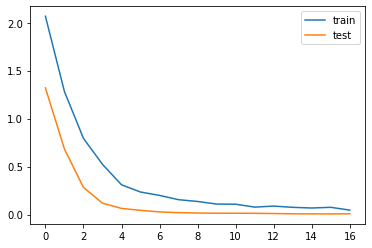

In [10]:
# plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [11]:
print('\n# TEST DATA #\n')
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# Predection 
print('\n# Generate predictions for 3 samples')

print("y[0]: "+ y_test[0])
print("y[10]: "+ y_test[10])
print("y[20]: "+ y_test[20])

print(model.predict_classes(X_test[0:1]))
print(model.predict_classes(X_test[10:11]))
print(model.predict_classes(X_test[20:21]))



# TEST DATA #

30/30 [==============================] - 0s 33us/step
accuracy: 100.00%

# Generate predictions for 3 samples
y[0]: 0
y[10]: 1
y[20]: 2
[0]
[1]
[2]


In [12]:
print('\n# RODOLFO DATA #\n')
score = model.evaluate(X_rodolfo, y_rodolfo)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# Predection 
print('\n# Generate predictions for 3 samples')

print("y[0]: "+ y_rodolfo[0])
print("y[5]: "+ y_rodolfo[5])
print("y[15]: "+ y_rodolfo[15])

print(model.predict_classes(X_rodolfo[0:1]))
print(model.predict_classes(X_rodolfo[5:6]))
print(model.predict_classes(X_rodolfo[15:16]))


# RODOLFO DATA #

20/20 [==============================] - 0s 50us/step
accuracy: 0.00%

# Generate predictions for 3 samples
y[0]: 3
y[5]: 3
y[15]: 3
[0]
[0]
[0]


In [13]:
print('\n# ANKUR DATA #\n')
score = model.evaluate(X_ankur, y_ankur)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# Predection 
print('\n# Generate predictions for 3 samples')

print("y[0]: "+ y_ankur[0])
print("y[5]: "+ y_ankur[5])
print("y[8]: "+ y_ankur[8])

print(model.predict_classes(X_ankur[0:1]))
print(model.predict_classes(X_ankur[5:6]))
print(model.predict_classes(X_ankur[8:9]))


# ANKUR DATA #

10/10 [==============================] - 0s 100us/step
accuracy: 0.00%

# Generate predictions for 3 samples
y[0]: 3
y[5]: 3
y[8]: 3
[0]
[0]
[0]


In [14]:
print('\n# CAROLINE DATA #\n')
score = model.evaluate(X_caroline, y_caroline)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# Predection 
print('\n# Generate predictions for 3 samples')

print("y[0]: "+ y_caroline[0])
print("y[5]: "+ y_caroline[5])
print("y[8]: "+ y_caroline[8])

print(model.predict_classes(X_caroline[0:1]))
print(model.predict_classes(X_caroline[5:6]))
print(model.predict_classes(X_caroline[8:9]))


# CAROLINE DATA #

20/20 [==============================] - 0s 100us/step
accuracy: 0.00%

# Generate predictions for 3 samples
y[0]: 3
y[5]: 3
y[8]: 3
[0]
[0]
[0]
